In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

In [14]:
url = 'https://github.com/1010code/iris-dnn-tensorflow/raw/master/data/Iris.csv'
s = requests.get(url).content
df_data = pd.read_csv(io.StringIO(s.decode("utf-8")))
df_data = df_data.drop(labels=["Id"],axis=1)
df_data


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df_data["Class"] = df_data["Species"].map(label_map)
df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [17]:
x = df_data.drop(labels=["Species","Class"],axis=1).values
print(len(np.where(np.isnan(x))[0]))

0


In [35]:
from sklearn.cluster import KMeans
kmeans_M = KMeans(n_clusters=3,random_state=73)
cluster = kmeans_M.fit(x)
cluster_pred =  cluster.predict(x)

In [25]:
cluster_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [23]:
kmeans_M.inertia_

78.94084142614602

In [26]:
kmeans_M.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


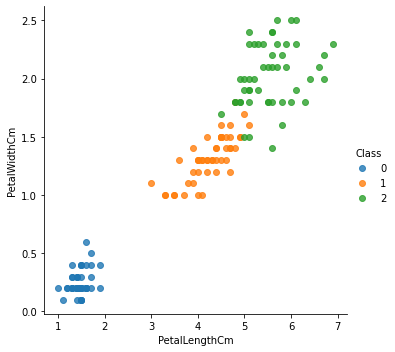

In [27]:
sns.lmplot("PetalLengthCm", "PetalWidthCm", hue='Class', data=df_data, fit_reg=False)

C:\Users\ez945\.virtualenvs\AI-BqhCg0LE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


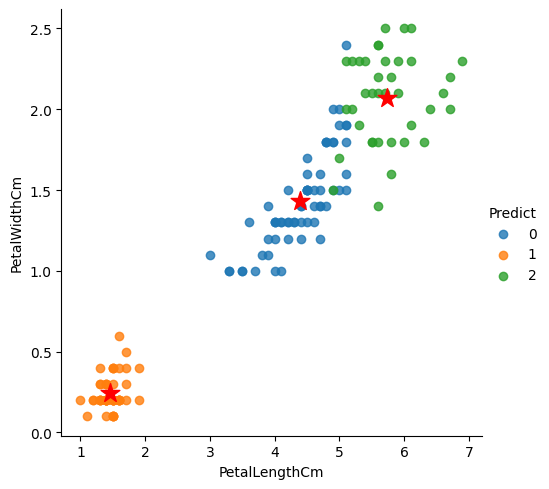

In [40]:
df_data["Predict"] = cluster_pred
sns.lmplot("PetalLengthCm", "PetalWidthCm", data=df_data, hue="Predict", fit_reg=False)
plt.scatter(kmeans_M.cluster_centers_[:,2],kmeans_M.cluster_centers_[:,3],s=200,c="r",marker="*")

In [42]:
kmeans_list = [KMeans(n_clusters=k,random_state=46).fit(x) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_list]

ValueError: x and y must have same first dimension, but have shapes (8,) and (9,)

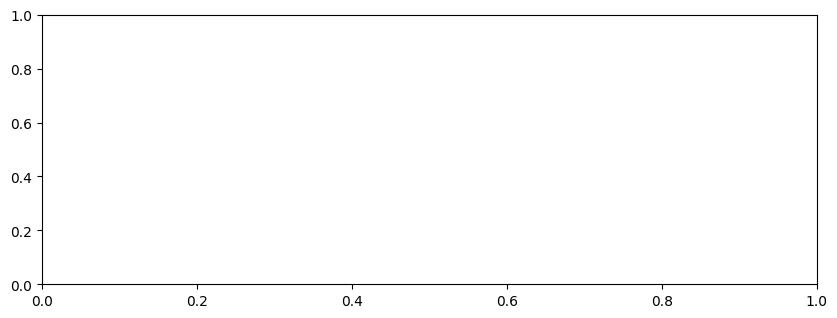

In [63]:
plt.figure(figsize = (10,3.5))
plt.plot(range(1,10),inertias,"bo-")
plt.xlabel("$k$",fontsize=14)
plt.ylabel("$Inertia$",fontsize=14)
plt.annotate("Elobow",xy=(3,inertias[3]),xytext=(0.55,0.55),textcoords="figure fraction",fontsize=16,arrowprops= dict(facecolor="black",shrink=0.1))
plt.axis([1, 8.5, 0, 1300])

In [60]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(x, model.labels_)
                     for model in kmeans_list[1:]]

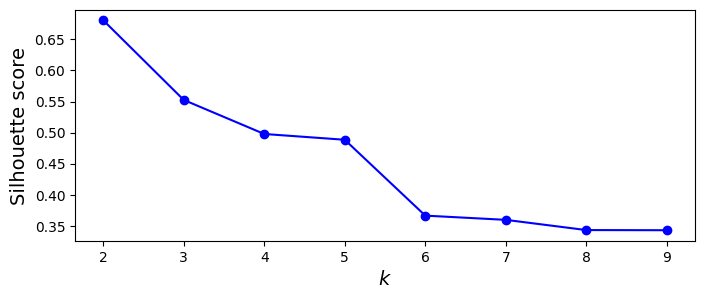

In [61]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()